<a href="https://colab.research.google.com/github/simonkaley/Lab1-Understanding-Feedforward-Neural-Network/blob/main/lab1_ming_chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model 1 - Training Loss: 1579.05078125, Test Loss: 1786.1270751953125
Model 2 - Training Loss: 1579.4412841796875, Test Loss: 1783.2279052734375
Model 3 - Training Loss: 1581.817138671875, Test Loss: 1793.380859375
Shapes of weights: [(1, 64), (64, 32), (32, 1)]
Shapes of biases: [(64,), (32,), (1,)]
1/1 [==============================] - 0s 53ms/step

Manual Feedforward Outputs:
[ 28.28079547  17.98083812 -16.58512047  -7.04165716  -3.08461139]

Model Predict Outputs:
[-2.3903513 -1.6552069 -1.7663101 -0.559884  -0.0602254]
32/32 [==============================] - 0s 2ms/step


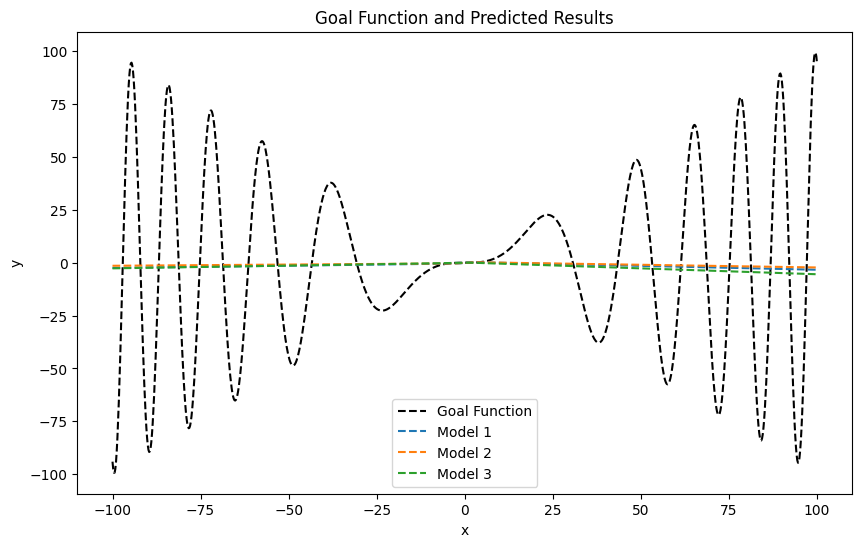

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#define the function
def target_function(x):
    return x * np.sin(x**2 / 300)

#generate training data
num_samples = 1000
x_values = np.linspace(-100, 100, num_samples)
y_values = target_function(x_values)

#split the data into training (40%) and test (60%)
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.6, random_state=42)

#reshape data for input to the model
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

#model 1
model_1 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_1.compile(optimizer='adam', loss='mean_squared_error')
history_1 = model_1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0)

#model 2
model_2 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_2.compile(optimizer='adam', loss='mean_squared_error')
history_2 = model_2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0)

#model 3
model_3 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_3.compile(optimizer='adam', loss='mean_squared_error')
history_3 = model_3.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0)

#evaluate models on training and test data
loss_train_1 = model_1.evaluate(x_train, y_train, verbose=0)
loss_test_1 = model_1.evaluate(x_test, y_test, verbose=0)

loss_train_2 = model_2.evaluate(x_train, y_train, verbose=0)
loss_test_2 = model_2.evaluate(x_test, y_test, verbose=0)

loss_train_3 = model_3.evaluate(x_train, y_train, verbose=0)
loss_test_3 = model_3.evaluate(x_test, y_test, verbose=0)

print(f"Model 1 - Training Loss: {loss_train_1}, Test Loss: {loss_test_1}")
print(f"Model 2 - Training Loss: {loss_train_2}, Test Loss: {loss_test_2}")
print(f"Model 3 - Training Loss: {loss_train_3}, Test Loss: {loss_test_3}")

#get weights and biases for the model with the highest accuracy (assuming Model 1)
best_model = model_1
weights_and_biases = best_model.get_weights()

#separate weights and biases
weights = [weights_and_biases[i] for i in range(0, len(weights_and_biases), 2)]
biases = [weights_and_biases[i] for i in range(1, len(weights_and_biases), 2)]

#display the shapes of weights and biases
print("Shapes of weights:", [w.shape for w in weights])
print("Shapes of biases:", [b.shape for b in biases])

#choose 5 data points from the training dataset
sample_indices = [0, 50, 100, 150, 200]  # Adjust these indices based on your dataset size
x_samples = x_train[sample_indices]

#manually calculate the feedforward output
manual_outputs = x_samples
for i in range(len(weights)):
    manual_outputs = np.dot(manual_outputs, weights[i]) + biases[i]

#use model.predict() to get the predicted outputs
predicted_outputs = best_model.predict(x_samples)

#display the results
print("\nManual Feedforward Outputs:")
print(manual_outputs.flatten())  # Flatten the output for comparison
print("\nModel Predict Outputs:")
print(predicted_outputs.flatten())

#plot the goal function and predicted results
plt.figure(figsize=(10, 6))

#plot the goal function
plt.plot(x_values, y_values, label='Goal Function', color='black', linestyle='--')

#plot the predicted results for Model 1
predictions_1 = model_1.predict(x_values.reshape(-1, 1))
plt.plot(x_values, predictions_1, label='Model 1', linestyle='--')

#plot the predicted results for Model 2
predictions_2 = model_2.predict(x_values.reshape(-1, 1))
plt.plot(x_values, predictions_2, label='Model 2', linestyle='--')

#plot the predicted results for Model 3
predictions_3 = model_3.predict(x_values.reshape(-1, 1))
plt.plot(x_values, predictions_3, label='Model 3', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Goal Function and Predicted Results')
plt.legend()
plt.show()


